<a href="https://colab.research.google.com/github/gordonunus/flask-image-processing/blob/main/Kegiatan_modul_4_Kelompok_zzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 6.2 MB/s 


In [2]:
!pip install opendatasets

In [3]:
pip install tensorflow

In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/c/aptos2019-blindness-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ernowogordonunus
Your Kaggle Key: ··········


100%|██████████| 9.51G/9.51G [03:31<00:00, 48.2MB/s]



Extracting archive ./aptos2019-blindness-detection/aptos2019-blindness-detection.zip to ./aptos2019-blindness-detection


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
train_dir = 'aptos2019-blindness-detection/train_images'
test_dir = 'aptos2019-blindness-detection/test_images'

In [8]:
train_csv=pd.read_csv('aptos2019-blindness-detection/train.csv')
test_csv=pd.read_csv('aptos2019-blindness-detection/test.csv')

In [9]:
train=[]
trainlabel=[]
for im in tqdm(os.listdir(train_dir)):
    image=load_img(os.path.join(train_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    train+=[image]
    trainlabel+=[train_csv[train_csv['id_code']==im[0:-4]]['diagnosis'].iat[0]]

100%|██████████| 3662/3662 [08:08<00:00,  7.50it/s]


In [10]:
test=[]
for im in tqdm(os.listdir(test_dir)):
    image=load_img(os.path.join(test_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]


100%|██████████| 1928/1928 [01:22<00:00, 23.31it/s]


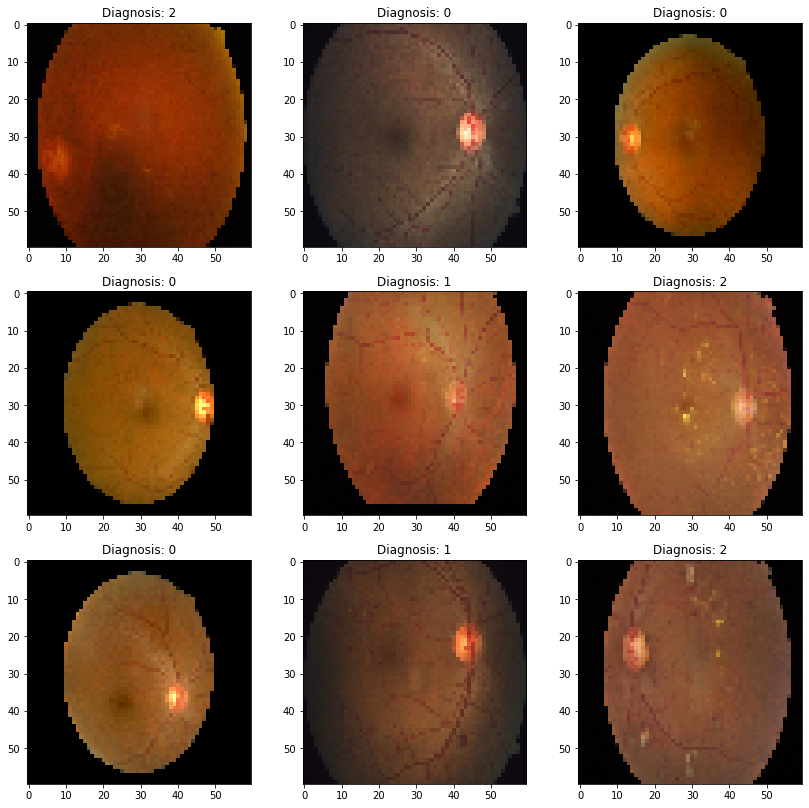

In [11]:
fig,axs = plt.subplots(3,3,figsize=(14,14))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].imshow(train[i])
    ax=axs[r][c].set_title('Diagnosis: '+str(trainlabel[i]))    
plt.show()

In [12]:
train=np.array(train)
trainlabel=np.array(trainlabel)
test=np.array(test)

In [13]:
trainlabel2=to_categorical(trainlabel)

In [14]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [15]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [16]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [19]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [20]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 38s 400ms/step - loss: 1.5530 - accuracy: 0.5227 - val_loss: 2.5377 - val_accuracy: 0.2565
Epoch 2/100
92/92 [==============================] - 37s 399ms/step - loss: 1.0433 - accuracy: 0.6227 - val_loss: 2.1617 - val_accuracy: 0.2578
Epoch 3/100
92/92 [==============================] - 37s 397ms/step - loss: 0.9576 - accuracy: 0.6586 - val_loss: 2.2145 - val_accuracy: 0.2565
Epoch 4/100
92/92 [==============================] - 37s 399ms/step - loss: 0.9384 - accuracy: 0.6651 - val_loss: 1.4800 - val_accuracy: 0.3124
Epoch 5/100
92/92 [==============================] - 37s 398ms/step - loss: 0.9134 - accuracy: 0.6767 - val_loss: 1.3626 - val_accuracy: 0.4270
Epoch 6/100
92/92 [==============================] - 36s 396ms/step - loss: 0.9138 - accuracy: 0.6685 - val_loss: 0.8385 - val_accuracy: 0.7067
Epoch 7/100
92/92 [==============================] - 36s 396ms/step - loss: 0.8824 - accuracy: 0.6729 - val_loss: 0.7816 - val_accuracy:

In [21]:
from keras.models import save_model
model.save('model/Moduul3/model3.1.h5')

In [22]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model2 = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])




In [23]:
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
his2=model2.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 39s 413ms/step - loss: 1.5000 - accuracy: 0.4561 - val_loss: 1.8921 - val_accuracy: 0.2565
Epoch 2/100
92/92 [==============================] - 38s 412ms/step - loss: 1.1842 - accuracy: 0.5726 - val_loss: 2.5924 - val_accuracy: 0.1623
Epoch 3/100
92/92 [==============================] - 38s 410ms/step - loss: 1.0503 - accuracy: 0.6193 - val_loss: 2.4773 - val_accuracy: 0.2565
Epoch 4/100
92/92 [==============================] - 38s 410ms/step - loss: 1.0187 - accuracy: 0.6309 - val_loss: 1.7221 - val_accuracy: 0.3465
Epoch 5/100
92/92 [==============================] - 38s 411ms/step - loss: 0.9577 - accuracy: 0.6569 - val_loss: 1.6677 - val_accuracy: 0.3383
Epoch 6/100
92/92 [==============================] - 37s 407ms/step - loss: 0.9731 - accuracy: 0.6470 - val_loss: 0.9949 - val_accuracy: 0.6494
Epoch 7/100
92/92 [==============================] - 37s 407ms/step - loss: 0.9434 - accuracy: 0.6582 - val_loss: 0.8006 - val_accuracy:

In [25]:
model2.save('model/Moduul3/model3.2.h5')

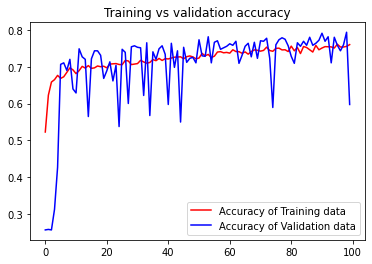

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelacc1.svg")

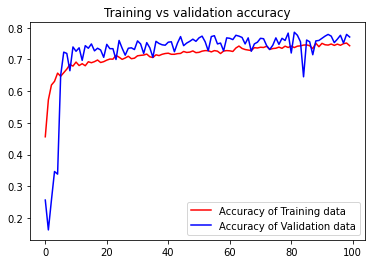

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
get_acc2 = his2.history['accuracy']
value_acc2 = his2.history['val_accuracy']
get_loss2 = his2.history['loss']
validation_loss2 = his2.history['val_loss']

epochs = range(len(get_acc2))
plt.plot(epochs, get_acc2, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc2, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelacc2.svg")

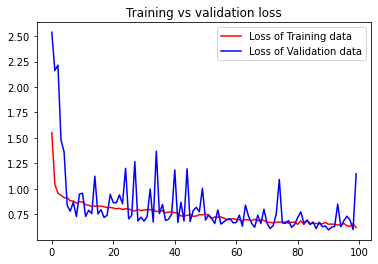

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelloss1.svg")

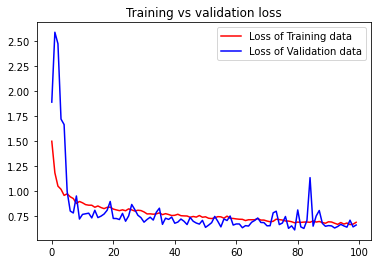

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
epochs = range(len(get_loss2))
plt.plot(epochs, get_loss2, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss2, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelloss2.svg")

In [31]:
train_x=np.array(trainx)
test_x=np.array(testx)

test_y=datagen

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [33]:
from sklearn.metrics import classification_report

pred = model.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       389
           1       1.00      0.01      0.03        75
           2       0.42      0.71      0.52       188
           3       0.29      0.32      0.31        28
           4       0.31      0.08      0.12        53

   micro avg       0.64      0.56      0.60       733
   macro avg       0.60      0.36      0.35       733
weighted avg       0.76      0.56      0.58       733
 samples avg       0.56      0.56      0.56       733



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import classification_report

pred = model2.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       389
           1       0.80      0.05      0.10        75
           2       0.62      0.53      0.57       188
           3       0.00      0.00      0.00        28
           4       0.50      0.04      0.07        53

   micro avg       0.86      0.65      0.74       733
   macro avg       0.58      0.32      0.34       733
weighted avg       0.79      0.65      0.67       733
 samples avg       0.65      0.65      0.65       733



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Definisi data generator

In [78]:
!ls aptos2019-blindness-detection

ls: cannot access 'aptos2019-blindness-detection': No such file or directory


In [41]:
%cd aptos2019-blindness-detection/

/content/aptos2019-blindness-detection


In [85]:
!ls 

logs  sample_submission.csv  test.csv  test_images  train.csv  train_images


In [82]:
%cd aptos2019-blindness-detection

[Errno 2] No such file or directory: 'aptos2019-blindness-detection'
/content/aptos2019-blindness-detection


In [87]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

training_set = train_datagen.flow_from_directory("aptos2019-blindness-detection/train_images",
                                                 target_size=(128,128),
                                                 color_mode="rgb",
                                                 shuffle=False,
                                                 batch_size = 8,
                                                 class_mode='categorical')

FileNotFoundError: ignored

In [89]:
validation_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

validation_set = validation_datagen.flow_from_directory("aptos2019-blindness-detection/test_images",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 8)

FileNotFoundError: ignored

### Load TensorBoard notebook extension dan Hapus semua **logs** sebelumnya

In [62]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [63]:
%load_ext tensorboard

In [64]:
!rm -rf ./logs/ 

### Definisikan hparam yang ingin digunakan. 

Semakin banyak hparam yang didefinisikan maka semakin banyak pula kombinasi hyperparameter digunakan untuk training model. Semakin banyak kombinasi maka semakin memakan banyak waktu (FYI : lama training model yang digunakan dalam contoh ini +/- 3-4 jam menggunakan GPU).

Menyimpan semua summary hparam kedalam `logs/hparam_tuning` untuk digunakan oleh tensorboard dan sebagai penyimpanan sementara training information.

In [65]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'adadelta']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

### Definisikan `x_val dan y_val` dari validation data untuk evaluasi model.

In [66]:
xvl, yvl = zip(*(validation_set[i] for i in range(len(validation_set))))
x_val, y_val = np.vstack(xvl), np.vstack(yvl)

NameError: ignored

### Definisikan Model menggunakan hparam.

Disini anda mendefinisikan model, compile model, training model secara bersamaan didalam fungsi `train_test_model`. Fungsi ini akan mengembalikan nilai akurasi rata-rata dari masing-masing model.

In [70]:
def train_test_model(hparams):
  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (5, 5), 
                                                             activation=tf.nn.relu, 
                                                             input_shape=(128,128,3)),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(64, (5, 5), 
                                                             activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(32, (5, 5), 
                                                             activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(hparams[HP_NUM_UNITS], 
                                                            activation=tf.nn.relu),
                                      tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Dense(2, activation=tf.nn.softmax),
                                      ])

  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(training_set, 
            validation_data=validation_set, 
            epochs=10,
            )
  _, accuracy = model.evaluate(x_val, y_val)
  return accuracy

### Definisikan fungsi `run` 

Hal ini bertujuan untuk melakukan log record hparams yang berisi summary dari hyperparameters dan final accuracy-nya.

In [71]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

### Grid Search Training Model


Mulai jalankan training dan catat semuanya di bawah satu direktori induk.
Sekarang Anda dapat mencoba beberapa percobaan, latih masing-masing dengan serangkaian parameter yang berbeda. Untuk kesederhanaan, gunakan **grid search**: coba semua kombinasi parameter diskrit dan hanya batas bawah dan atas dari parameter bernilai riil. Untuk skenario yang lebih kompleks, mungkin lebih efektif untuk memilih setiap nilai hyperparameter secara acak (ini disebut **random search**). Ada metode yang lebih maju yang dapat digunakan.

Jalankan beberapa percobaan, hal ini akan memakan waktu yang cukup lama:

In [72]:
['adam', 'sgd', 'adadelta']

['adam', 'sgd', 'adadelta']

In [73]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'adadelta'}


NameError: ignored

### Visualisasi hasil evaluasi semua model dengan hyperparameternya menggunakan Tensorboard

In [ ]:
%%bash
wget -q 'https://storage.googleapis.com/download.tensorflow.org/tensorboard/hparams_demo_logs.zip'
unzip -q hparams_demo_logs.zip -d logs/hparam_demo

replace logs/hparam_demo/hparams_demo/0/events.out.tfevents.1550612933.goshri.c.googlers.com? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [ ]:
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!kill 5496